In [0]:
import matplotlib.pyplot as plt

# 1. Load Dataset

![](https://mammothmemory.net/images/user/base/Biology/1.15.3%20Diagram%20of%20a%20sepal%20(2).jpg)

In [0]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

# sepal length, sepal width, petal length, petal width
print(f'Features \n {X[:10]} \n')
print(f'Target \n {y}')

Features 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] 

Target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 2. Variance Threshold

In [0]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.3)

sel.fit_transform(X)[:10]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])

# 3. Correlated Features

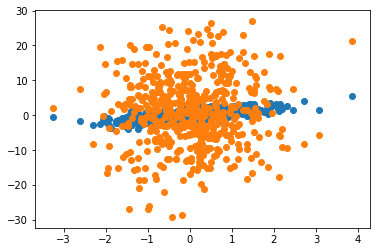

In [0]:
import numpy as np
from scipy.stats import pearsonr

np.random.seed(42)
x1 = np.random.normal(0, 1, 500)
x2 = x1 + np.random.normal(0, 1, 500)
x3 = x1 + np.random.normal(0, 10, 500)

plt.scatter(x1, x2)
plt.scatter(x1, x3)

In [0]:
print(pearsonr(x1, x2))
print(pearsonr(x1, x3))

(0.6811405918134971, 1.9520324398684079e-69)
(0.03937486620402585, 0.37962586391466446)


In [0]:
print(pearsonr(X[:, 0], X[:, 1]))
print(pearsonr(X[:, 0], X[:, 2]))
print(pearsonr(X[:, 0], X[:, 3]))

(-0.11756978413300206, 0.15189826071144766)
(0.8717537758865831, 1.0386674194498099e-47)
(0.8179411262715756, 2.325498079793272e-37)


# 4. Mutual Information

In [0]:
from sklearn.feature_selection import mutual_info_classif

print(mutual_info_classif(X, y))

[0.48451775 0.20941727 0.99280814 0.98327118]


# 5. Chi Squared

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [0]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
X_new[:10]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])